In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

data_file_path = '/content/welddb.data'
headers_file_path = '/content/welddb.tex'

# Read the headers from the file
with open(headers_file_path, 'r') as f:
    headers = [line.strip() for line in f]

# Check for duplicate headers
if len(headers) != len(set(headers)):
    print("Duplicate column names found:", [name for name in headers if headers.count(name) > 1])

    # Manually make the headers unique
    seen = {}
    unique_headers = []
    for header in headers:
        if header in seen:
            seen[header] += 1
            unique_headers.append(f"{header}_{seen[header]}")  # Append a suffix to make it unique
        else:
            seen[header] = 0
            unique_headers.append(header)

    headers = unique_headers

# Read the data with unique headers
df = pd.read_csv(data_file_path, sep=r'\s+', header=None, names=headers)

# Check the result
print(df.head())


Duplicate column names found: ['\\bigskip', '\\bigskip', '\\bigskip', '\\medskip', '\\bigskip', '\\bigskip', '\\bigskip', '\\bigskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\medskip', '\\bigskip', '\\medskip', '\\bigskip', '\\bigskip', '\\bigskip', '\\bigskip']
   \hsize=6.25truein  \vsize=9.65truein  \tolerance=15000 \pretolerance=15000  \
0              0.037               0.30              0.65               0.008   
1              0.037               0.30              

In [ ]:
df

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Charpy temperature (deg C),Charpy impact toughness (J),Hardness (kgmm-2),50 % FATT,Primary ferrite in microstructure (%),Ferrite with second phase (%),Acicular ferrite (%),Martensite (%),Ferrite with carbide aggregate (%),Weld ID
0,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-28,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-38,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,-48,100,N,N,32,28,40,0,0,Evans-Ni/CMn-1990/1991-0Bawch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX35
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX36
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX37
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,N,...,N,N,N,N,N,N,N,N,N,Birmingham-MAX38


First, we will replace the N values with a nan variable

In [ ]:
#Replace missing values with NaN
df.replace('N', np.nan, inplace=True)

Let's see the vartiables types so that we can convert the types of the variables to the right format

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1648 non-null   object 
 4   Phosphorus concentration (weight%)            1642 non-null   object 
 5   Nickel concentration (weight%)                697 non-null    object 
 6   Chromium concentration (weight%)              784 non-null    object 
 7   Molybdenum concentration (weight%)            793 non-null    object 
 8   Vanadium concentration (weight%)              928 non-null    object 
 9   Copper concentration (weight%)                578 non-null    o

We should convert all te numerical variables to numerical type, but let's see this column

In [ ]:
#see the 1197th row
df.loc[1197]

Carbon concentration (weight%)                             0.06
Silicon concentration (weight%)                            0.32
Manganese concentration (weight%)                          1.23
Sulphur concentration (weight%)                          <0.002
Phosphorus concentration (weight%)                        0.002
Nickel concentration (weight%)                             1.01
Chromium concentration (weight%)                            8.4
Molybdenum concentration (weight%)                         0.89
Vanadium concentration (weight%)                           0.22
Copper concentration (weight%)                            <0.01
Cobalt concentration (weight%)                            <0.01
Tungsten concentration (weight%)                            NaN
Oxygen concentration (ppm)                                  380
Titanium concentration (ppm)                               <100
Nitrogen concentration (ppm)                                 80
Aluminium concentration (ppm)           

Some lines that are expected to have numerical values may contain some non numerical one (like the '<0.002' value assigned to the variable 'Sulphur concentration (weight%)' for the 1197th row of the dataframe)

First, we will convert only possible rows then we will treat the rest

In [ ]:
#Convert the variables to numeric if possible
df = df.apply(pd.to_numeric, errors='ignore')

C:\Users\moham\AppData\Local\Temp\ipykernel_6604\1754603372.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1648 non-null   object 
 4   Phosphorus concentration (weight%)            1642 non-null   float64
 5   Nickel concentration (weight%)                697 non-null    float64
 6   Chromium concentration (weight%)              784 non-null    float64
 7   Molybdenum concentration (weight%)            793 non-null    object 
 8   Vanadium concentration (weight%)              928 non-null    object 
 9   Copper concentration (weight%)                578 non-null    o

We can see that already 23 columns have no problems.
Now, we will deal with the other numerical columns that may contain some anomalies (like the '<' in the last example)

First, we will remove the '<' symbole from numerical variables

In [ ]:
df.replace({r'<': '', }, regex=True, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')


C:\Users\moham\AppData\Local\Temp\ipykernel_6604\2566959729.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1648 non-null   float64
 4   Phosphorus concentration (weight%)            1642 non-null   float64
 5   Nickel concentration (weight%)                697 non-null    float64
 6   Chromium concentration (weight%)              784 non-null    float64
 7   Molybdenum concentration (weight%)            793 non-null    float64
 8   Vanadium concentration (weight%)              928 non-null    float64
 9   Copper concentration (weight%)                578 non-null    f

We still have 7 'object' type columns, let's explore them

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns

df[object_columns]

,Nitrogen concentration (ppm),AC or DC,Electrode positive or negative,Interpass temperature (deg C),Type of weld,Hardness (kgmm-2),Weld ID
0,NaN,DC,+,200,MMA,NaN,Evans-Ni/CMn-1990/1991-0Aaw
1,NaN,DC,+,200,MMA,NaN,Evans-Ni/CMn-1990/1991-0Aawch
2,NaN,DC,+,200,MMA,NaN,Evans-Ni/CMn-1990/1991-0Aht
3,NaN,DC,+,200,MMA,NaN,Evans-Ni/CMn-1990/1991-0Baw
4,NaN,DC,+,200,MMA,NaN,Evans-Ni/CMn-1990/1991-0Bawch
...,...,...,...,...,...,...,...
1647,398,NaN,+,200,SA,NaN,Birmingham-MAX35
1648,394,NaN,+,200,SA,NaN,Birmingham-MAX36
1649,96,NaN,+,200,SA,NaN,Birmingham-MAX37
1650,99,NaN,+,200,SA,NaN,Birmingham-MAX38


We can see that the 3 columns 'Nitrogen concentration (ppm)', 'Interpass temperature (deg C)' and 'Hardness (kgmm-2)' should have numerical values.
Let's see what are the non-numerical values in these columns

In [ ]:
list_of_numeric_columns = ['Nitrogen concentration (ppm)', 'Interpass temperature (deg C)', 'Hardness (kgmm-2)']

In [ ]:
#see all the unique values in the these columns
for column in list_of_numeric_columns:
    print(column, df[column].unique())
    print('\n')

Nitrogen concentration (ppm) [nan '72' '54' '57' '47' '44' '46' '68' '55' '53' '50' '48' '52' '89' '70'
 '41' '38' '80' '49' '77' '94' '65' '67' '58' '60' '460' '480' '160' '155'
 '67tot33res' '66totndres' '61tot34res' '54totndres' '54tot24res'
 '52tot18res' '50tot17res' '48tot18res' '78' '88' '75' '84' '85' '79' '76'
 '83' '92' '74' '86' '90' '110' '97' '99' '91' '105' '120' '150' '81' '87'
 '93' '102' '96' '66' '73' '71' '82' '145' '148' '164' '166' '235' '226'
 '243' '239' '253' '249' '240' '100' '143' '119' '539' '515' '494' '489'
 '552' '517' '520' '544' '526' '537' '529' '509' '523' '107' '114' '106'
 '117' '125' '95' '109' '64' '36' '63' '43' '39' '34' '69' '59' '37' '51'
 '56' '140' '190' '170' '124' '133' '108' '61' '122' '121' '131' '101'
 '103' '116' '138' '139' '62' '136' '540' '180' '450' '370' '250' '400'
 '430' '420' '410' '390' '260' '340' '26' '22' '21' '35' '127' '156' '245'
 '312' '266' '123' '236' '165' '113' '269' '45' '27' '42' '98' '373' '376'
 '416' '398' '394']

Let's adress the first column : 'Nitrogen concentration (ppm)'

In [ ]:
df1 = df.copy()

In [ ]:
# Find the non-numeric entries in 'Nitrogen concentration (ppm)'
df1['Nitrogen concentration (ppm)_numeric'] = pd.to_numeric(df1['Nitrogen concentration (ppm)'], errors='coerce')

# Identify rows where the conversion resulted in NaN (indicating non-numeric values)
problematic_entries = df1[df1['Nitrogen concentration (ppm)_numeric'].isna() & ~df1['Nitrogen concentration (ppm)'].isna()]['Nitrogen concentration (ppm)'].unique()

df1 = df1.drop(columns=['Nitrogen concentration (ppm)_numeric'])

problematic_entries

array(['67tot33res', '66totndres', '61tot34res', '54totndres',
       '54tot24res', '52tot18res', '50tot17res', '48tot18res'],
      dtype=object)

After extensive investigation into the meaning of these values, we discovered through various articles that the notation XtotYres is an abbreviation for X total and Y residual. This indicates that the nitrogen concentration in the material is divided into two components: the total concentration (X) and the residual concentration (Y), which remains after some process (nd stands for non-detected)

For the purpose of our analysis, we will focus on the total concentration (X), as it represents the complete amount of nitrogen present in the material before any processes or reactions occur. The residual concentration often reflects secondary or incomplete reactions and is typically less representative of the material's initial state or overall chemical composition. By considering the total concentration, we ensure that our analysis captures the full nitrogen content, which is more relevant for evaluating the material's properties and predicting weld quality.

We will therefore replace the values of these cases with the total concentration (X)

In [ ]:
# convert the problematic entries to numeric

def converter(x):
    try:
        return float(x)
    except:
        return float(x[:2])

In [ ]:
df['Nitrogen concentration (ppm)'] = df['Nitrogen concentration (ppm)'].apply(converter)

In [ ]:
df['Nitrogen concentration (ppm)']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1647    398.0
1648    394.0
1649     96.0
1650     99.0
1651    103.0
Name: Nitrogen concentration (ppm), Length: 1652, dtype: float64

Now, all 'Nitrogen concentration (ppm)' values are numerical


Let's adress the second column : Interpass temperature (deg C)

In [ ]:
df1 = df.copy()

In [ ]:
# Find the non-numeric entries in 'Nitrogen concentration (ppm)'
df1['Interpass temperature (deg C)_numeric'] = pd.to_numeric(df1['Interpass temperature (deg C)'], errors='coerce')

# Identify rows where the conversion resulted in NaN (indicating non-numeric values)
problematic_entries = df1[df1['Interpass temperature (deg C)_numeric'].isna() & ~df1['Interpass temperature (deg C)'].isna()]['Interpass temperature (deg C)'].unique()

df1 = df1.drop(columns=['Interpass temperature (deg C)_numeric'])

problematic_entries

array(['150-200'], dtype=object)

The only non-numerical value here is :  '150-200'

In [ ]:
# see the rows with a value of '150-200' in 'Interpass temperature (deg C)'
df1[df1['Interpass temperature (deg C)'] == '150-200'].head()

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Charpy temperature (deg C),Charpy impact toughness (J),Hardness (kgmm-2),50 % FATT,Primary ferrite in microstructure (%),Ferrite with second phase (%),Acicular ferrite (%),Martensite (%),Ferrite with carbide aggregate (%),Weld ID
1166,0.08,0.45,0.96,0.007,0.015,0.21,9.1,0.96,0.19,0.03,...,NaN,NaN,459Hv10,NaN,2.0,NaN,NaN,NaN,NaN,PantK-1990-w1
1167,0.10,0.54,0.66,0.006,0.014,0.31,9.0,0.82,0.23,0.02,...,NaN,NaN,405Hv10,NaN,11.0,NaN,NaN,NaN,NaN,PantK-1990-w2
1168,0.09,0.46,0.99,0.012,0.021,0.22,9.5,0.96,0.19,0.03,...,NaN,NaN,451Hv10,NaN,4.0,NaN,NaN,NaN,NaN,PantK-1990-w3
1169,0.09,0.37,1.03,0.004,0.010,0.05,8.8,1.03,0.25,0.01,...,NaN,NaN,432Hv10,NaN,12.0,NaN,NaN,NaN,NaN,PantK-1990-w4.0
1170,0.09,0.37,1.03,0.004,0.010,0.05,8.8,1.03,0.25,0.01,...,NaN,NaN,264Hv10,NaN,NaN,NaN,NaN,NaN,NaN,PantK-1990-w4.1


This variable, Interpass temperature (°C), describes the temperature of the material between multiple passes of the welding process. Maintaining a consistent interpass temperature is critical for ensuring the quality and mechanical properties of the weld. In some rows, the recorded value for this variable is given as a range, such as 150-200°C, rather than a single temperature. Since we need a numerical value for further analysis, we will transform this interval into its median value, which in this case is 175°C. This allows us to approximate the interpass temperature while ensuring that the data remains consistent and usable for modeling purposes.

In [ ]:
def converter(x):
    try:
        return float(x)
    except:
        return 175

In [ ]:
df['Interpass temperature (deg C)'] = df['Interpass temperature (deg C)'].apply(converter)
df['Interpass temperature (deg C)']

0       200.0
1       200.0
2       200.0
3       200.0
4       200.0
        ...  
1647    200.0
1648    200.0
1649    200.0
1650    200.0
1651    200.0
Name: Interpass temperature (deg C), Length: 1652, dtype: float64

Now, all 'Interpass temperature (deg C)' values are numerical


Let's adress the third column : Hardness (kgmm-2)

In [ ]:
df1 = df.copy()

In [ ]:
# Find the non-numeric entries in 'Nitrogen concentration (ppm)'
df1['Hardness (kgmm-2)_numeric'] = pd.to_numeric(df1['Hardness (kgmm-2)'], errors='coerce')

# Identify rows where the conversion resulted in NaN (indicating non-numeric values)
problematic_entries = df1[df1['Hardness (kgmm-2)_numeric'].isna() & ~df1['Hardness (kgmm-2)'].isna()]['Hardness (kgmm-2)'].unique()

df1 = df1.drop(columns=['Hardness (kgmm-2)_numeric'])

problematic_entries

array(['158(Hv30)', '155(Hv30)', '153(Hv30)', '161(Hv30)', '168(Hv30)',
       '203(Hv30)', '157(Hv30)', '174(Hv30)', '144(Hv30)', '143(Hv30)',
       '154(Hv30)', '170(Hv30)', '459Hv10', '405Hv10', '451Hv10',
       '432Hv10', '264Hv10', '241Hv10', '251Hv10', '225Hv10', '233Hv10',
       '208Hv10', '373Hv10', '224Hv10', '210Hv10', '212Hv10', '202Hv10',
       '204Hv10', '201Hv10', '398Hv10', '249Hv10', '226Hv10', '234Hv10',
       '219Hv10', '467Hv10', '277Hv10', '254Hv10', '263Hv10', '237Hv10',
       '362Hv10', '291Hv10', '262Hv10', '266Hv10', '253Hv10', '257Hv10',
       '246Hv10', '264Hv5', '269Hv5', '233Hv5', '226Hv5'], dtype=object)

In [ ]:
# remove ( and ) from the 'Hardness (kgmm-2)' column
df['Hardness (kgmm-2)'] = df['Hardness (kgmm-2)'].str.replace('(', '')
df['Hardness (kgmm-2)'] = df['Hardness (kgmm-2)'].str.replace(')', '')


<Axes: xlabel='Hardness (kgmm-2)'>

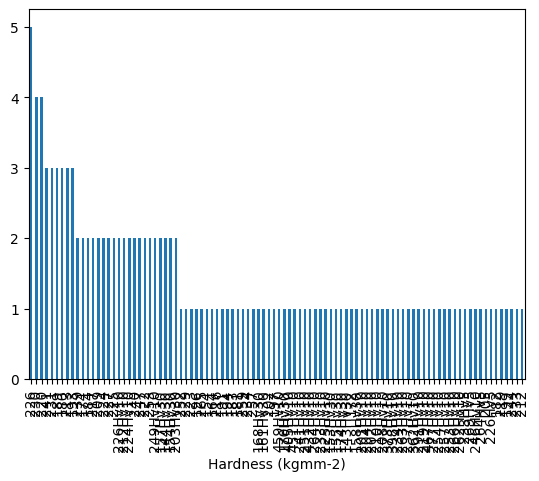

In [ ]:
#plot categorical data

df['Hardness (kgmm-2)'].value_counts().plot(kind='bar')

In [ ]:
#count the number of missing values

df['Hardness (kgmm-2)'].isnull().sum()

np.int64(1514)

In [ ]:
df1 = df.copy()

In [ ]:
df1['Hardness (kgmm-2)_numeric'] = pd.to_numeric(df1['Hardness (kgmm-2)'], errors='coerce')

# Identify rows where the conversion resulted in NaN (indicating non-numeric values)
problematic_entries = df1[df1['Hardness (kgmm-2)_numeric'].isna() & ~df1['Hardness (kgmm-2)'].isna()]['Hardness (kgmm-2)'].unique()

df1 = df1.drop(columns=['Hardness (kgmm-2)_numeric'])

problematic_entries

array(['158Hv30', '155Hv30', '153Hv30', '161Hv30', '168Hv30', '203Hv30',
       '157Hv30', '174Hv30', '144Hv30', '143Hv30', '154Hv30', '170Hv30',
       '459Hv10', '405Hv10', '451Hv10', '432Hv10', '264Hv10', '241Hv10',
       '251Hv10', '225Hv10', '233Hv10', '208Hv10', '373Hv10', '224Hv10',
       '210Hv10', '212Hv10', '202Hv10', '204Hv10', '201Hv10', '398Hv10',
       '249Hv10', '226Hv10', '234Hv10', '219Hv10', '467Hv10', '277Hv10',
       '254Hv10', '263Hv10', '237Hv10', '362Hv10', '291Hv10', '262Hv10',
       '266Hv10', '253Hv10', '257Hv10', '246Hv10', '264Hv5', '269Hv5',
       '233Hv5', '226Hv5'], dtype=object)

Quick cleaning

In [ ]:
# Open the headers file and clean the LaTeX formatting
cleaned_headers = []
with open(headers_file_path, 'r') as f:
    for line in f:
        clean_line = line.strip()
        # Filter out LaTeX formatting commands like \bigskip, \medskip, etc.
        if not any(latex_command in clean_line for latex_command in ['\\bigskip', '\\medskip', '\\item', '\\def', '\\font', '\\vspace']):
            cleaned_headers.append(clean_line)

# After cleaning, make sure the headers are valid and assign them to DataFrame
df = pd.read_csv(data_file_path, sep=r'\s+', header=None, names=cleaned_headers)


Correlation Matrix

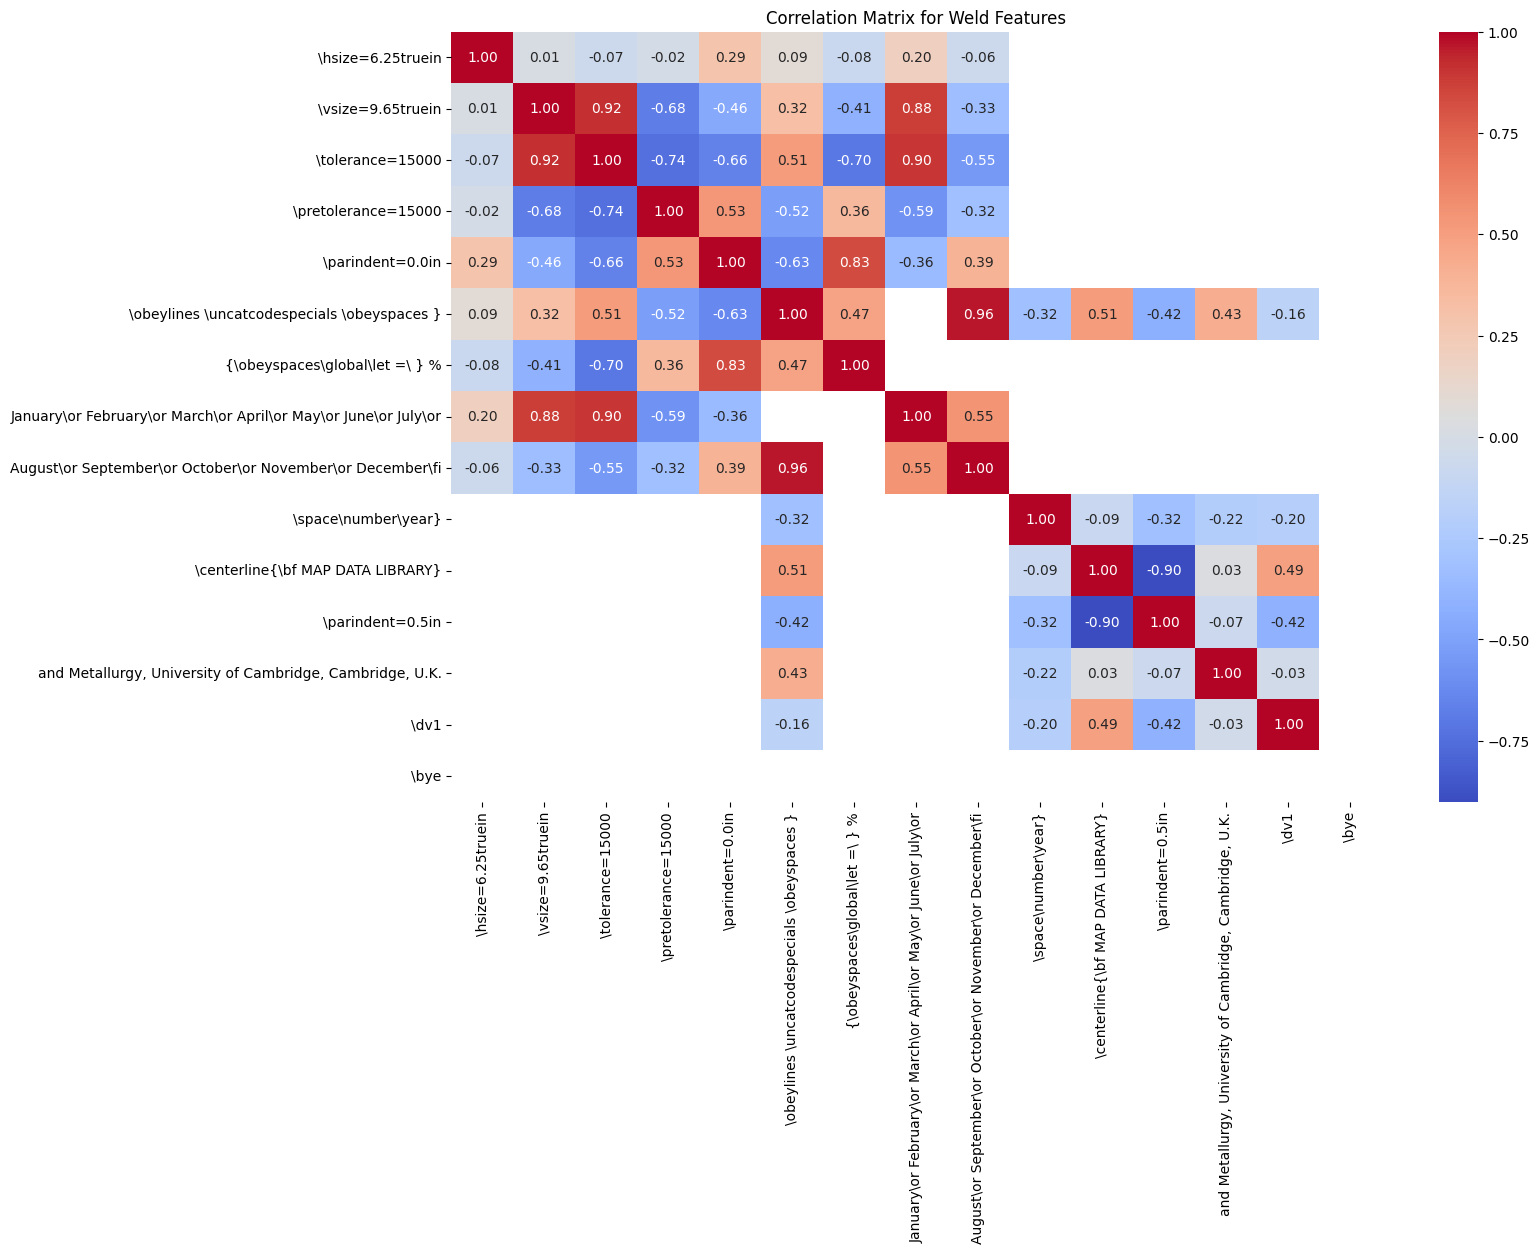

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert non-numeric values to NaN
df_cleaned = df.apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix for the cleaned DataFrame
corr_matrix = df_cleaned.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Weld Features')
plt.show()


Correlation Matrix Visualization

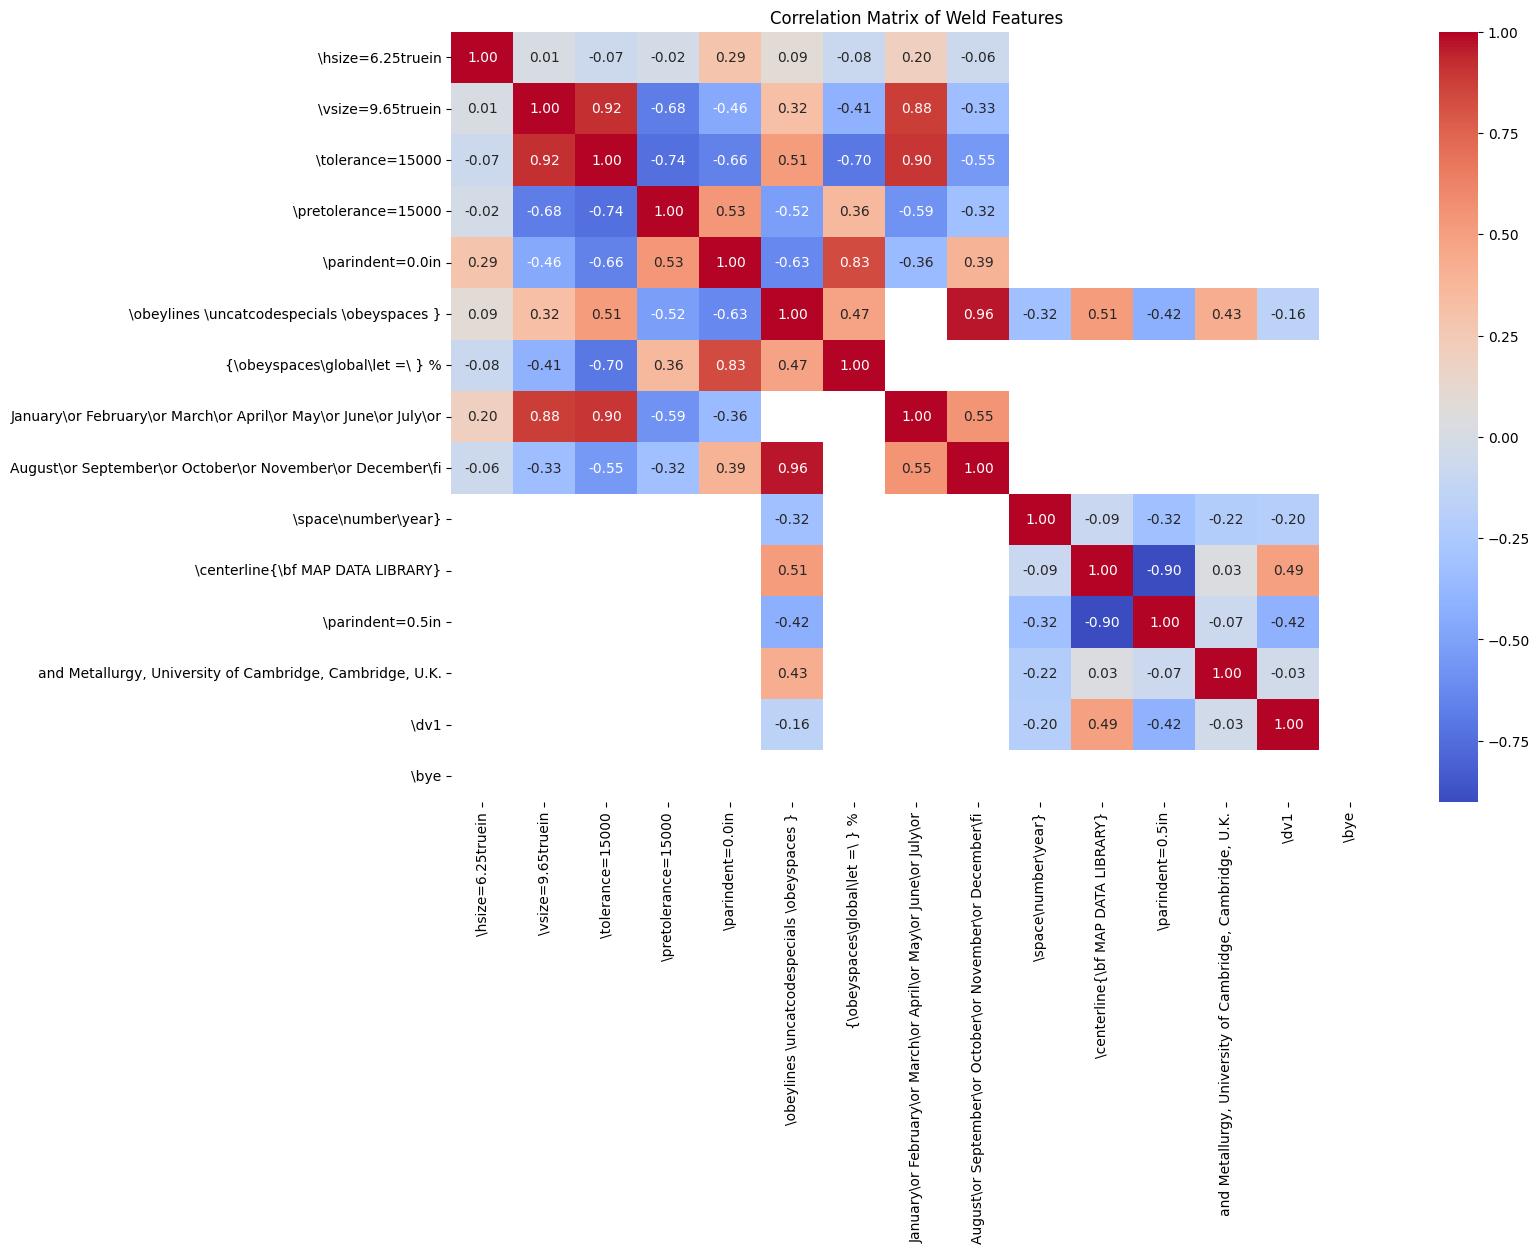

In [ ]:
# Heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Weld Features')
plt.show()


#Partie *PCA*


Cross validation visualisation

PCA ACP FCA MCA

In [ ]:
# Check for missing values and non-numeric values in the numerical columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Check for any NaN values
print(df_numeric.isnull().sum())

# Optionally, you can fill NaN values with a suitable value (like the mean)
df_numeric = df_numeric.fillna(df_numeric.mean())


Series([], dtype: float64)


# KNN to fill in the blancs and R F





---





---



Now Basicly I am working on the latests cleaned csv

Reading the CSV

In [ ]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/welddb_cleaned.csv')

In [ ]:
df.head()

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Type of weld_FCA,Type of weld_GMAA,Type of weld_GTAA,Type of weld_MMA,Type of weld_NGGMA,Type of weld_NGSAW,Type of weld_SA,Type of weld_SAA,Type of weld_ShMA,Type of weld_TSA
0,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False
1,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False
2,0.037,0.30,0.65,0.008,0.012,0.0,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False
3,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False
4,0.037,0.31,1.03,0.007,0.014,0.0,NaN,NaN,NaN,NaN,...,False,False,False,True,False,False,False,False,False,False


Apply the KNN but before we shoukd normelize our data

In [ ]:
# Replace NaN values with the mean of the column
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].fillna(df[column].mean(), inplace=True)

# Replace boolean values with 1 and 0
df = df.replace({True: 1, False: 0})

# Normalize the data using StandardScaler
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_normalized = df.copy()
df_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df_normalized.head())


   Carbon concentration (weight%)  Silicon concentration (weight%)  \
0                       -1.612394                        -0.254200   
1                       -1.612394                        -0.254200   
2                       -1.612394                        -0.254200   
3                       -1.612394                        -0.165249   
4                       -1.612394                        -0.165249   

   Manganese concentration (weight%)  Sulphur concentration (weight%)  \
0                          -1.447095                        -0.136415   
1                          -1.447095                        -0.136415   
2                          -1.447095                        -0.136415   
3                          -0.452386                        -0.225627   
4                          -0.452386                        -0.225627   

   Phosphorus concentration (weight%)  Nickel concentration (weight%)  \
0                           -0.048693                       -0.8125

<ipython-input-10-2365e7980474>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-10-2365e7980474>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


KNN applying to our normelized data

In [ ]:
from sklearn.impute import KNNImputer

# Create a KNNImputer object
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Apply the imputer to your DataFrame
try:
  df_imputed = imputer.fit_transform(df_normalized)
  df_imputed = pd.DataFrame(df_imputed, columns=df_normalized.columns)
  print("Data after KNN Imputation:\n", df_imputed.head())

except ValueError as e:
  print("Error during KNN Imputation:", e)

  print("Attempting to handle the error by removing non-numeric columns.")
  df_numeric_only = df_normalized.select_dtypes(include=['number'])
  try:
      df_imputed = imputer.fit_transform(df_numeric_only)
      df_imputed = pd.DataFrame(df_imputed, columns=df_numeric_only.columns)
      print("Data after KNN Imputation (after removing non-numeric columns):\n", df_imputed.head())
  except ValueError as e:
      print("Error during KNN Imputation (after removing non-numeric columns):", e)


Error during KNN Imputation: could not convert string to float: 'Evans-Ni/CMn-1990/1991-0Aaw'
Attempting to handle the error by removing non-numeric columns.
Data after KNN Imputation (after removing non-numeric columns):
    Carbon concentration (weight%)  Silicon concentration (weight%)  \
0                       -1.612394                        -0.254200   
1                       -1.612394                        -0.254200   
2                       -1.612394                        -0.254200   
3                       -1.612394                        -0.165249   
4                       -1.612394                        -0.165249   

   Manganese concentration (weight%)  Sulphur concentration (weight%)  \
0                          -1.447095                        -0.136415   
1                          -1.447095                        -0.136415   
2                          -1.447095                        -0.136415   
3                          -0.452386                        -0.2

Let's see what we got so far

In [ ]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Carbon concentration (weight%)                1652 non-null   float64
 1   Silicon concentration (weight%)               1652 non-null   float64
 2   Manganese concentration (weight%)             1652 non-null   float64
 3   Sulphur concentration (weight%)               1652 non-null   float64
 4   Phosphorus concentration (weight%)            1652 non-null   float64
 5   Nickel concentration (weight%)                1652 non-null   float64
 6   Chromium concentration (weight%)              1652 non-null   float64
 7   Molybdenum concentration (weight%)            1652 non-null   float64
 8   Vanadium concentration (weight%)              1652 non-null   float64
 9   Copper concentration (weight%)                1652 non-null   f

In [ ]:
df_imputed.describe()

,Carbon concentration (weight%),Silicon concentration (weight%),Manganese concentration (weight%),Sulphur concentration (weight%),Phosphorus concentration (weight%),Nickel concentration (weight%),Chromium concentration (weight%),Molybdenum concentration (weight%),Vanadium concentration (weight%),Copper concentration (weight%),...,Type of weld_FCA,Type of weld_GMAA,Type of weld_GTAA,Type of weld_MMA,Type of weld_NGGMA,Type of weld_NGSAW,Type of weld_SA,Type of weld_SAA,Type of weld_ShMA,Type of weld_TSA
count,1.652000e+03,1.652000e+03,1.652000e+03,1.652000e+03,1.652000e+03,1.652000e+03,1.652000e+03,1.652000e+03,1.652000e+03,1.652000e+03,...,1.652000e+03,1652.000000,1652.000000,1.652000e+03,1652.000000,1.652000e+03,1.652000e+03,1652.000000,1.652000e+03,1.652000e+03
mean,4.129062e-16,-4.301106e-16,-5.161327e-17,-1.548398e-16,-1.032265e-16,1.032265e-16,-2.408619e-16,-1.677431e-16,8.602212e-18,1.505387e-16,...,-6.881770e-17,0.000000,0.000000,-1.032265e-16,0.000000,6.021549e-17,-1.032265e-16,0.000000,-3.440885e-17,-1.720442e-17
std,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,1.000303e+00,...,1.000303e+00,1.000303,1.000303,1.000303e+00,1.000303,1.000303e+00,1.000303e+00,1.000303,1.000303e+00,1.000303e+00
min,-1.947250e+00,-2.566934e+00,-2.441805e+00,-7.608947e-01,-5.599039e-01,-8.125252e-01,-1.008461e+00,-1.449598e+00,-2.637428e-01,-9.020777e-01,...,-2.357776e-01,-0.049266,-0.049266,-1.492167e+00,-0.065233,-1.049567e-01,-4.331683e-01,-0.049266,-1.575243e-01,-2.357776e-01
25%,-5.764332e-01,-5.210542e-01,-6.879747e-01,-3.148380e-01,-3.042983e-01,-5.237601e-01,-5.105350e-01,-2.848893e-01,-2.562947e-01,-1.685220e-01,...,-2.357776e-01,-0.049266,-0.049266,-1.492167e+00,-0.065233,-1.049567e-01,-4.331683e-01,-0.049266,-1.575243e-01,-2.357776e-01
50%,-6.368496e-02,-7.629780e-02,1.758520e-01,-2.256267e-01,-1.509349e-01,1.086758e-16,-2.131311e-16,-1.679333e-16,0.000000e+00,1.454304e-16,...,-2.357776e-01,-0.049266,-0.049266,6.701663e-01,-0.065233,-1.049567e-01,-4.331683e-01,-0.049266,-1.575243e-01,-2.357776e-01
75%,4.385990e-01,2.795073e-01,6.208536e-01,4.200728e-02,5.354953e-02,1.086758e-16,-2.131311e-16,-1.679333e-16,0.000000e+00,1.454304e-16,...,-2.357776e-01,-0.049266,-0.049266,6.701663e-01,-0.065233,-1.049567e-01,-4.331683e-01,-0.049266,-1.575243e-01,-2.357776e-01
max,4.373157e+00,7.217707e+00,2.741155e+00,1.163948e+01,1.211813e+01,6.039529e+00,3.886810e+00,3.088229e+00,1.327835e+01,7.638606e+00,...,4.241286e+00,20.297783,20.297783,6.701663e-01,15.329710,9.527737e+00,2.308571e+00,20.297783,6.348228e+00,4.241286e+00


from matplotlib import pyplot as plt
_df_0['Carbon concentration (weight%)'].plot(kind='hist', bins=20, title='Carbon concentration (weight%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Silicon concentration (weight%)'].plot(kind='hist', bins=20, title='Silicon concentration (weight%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Manganese concentration (weight%)'].plot(kind='hist', bins=20, title='Manganese concentration (weight%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Sulphur concentration (weight%)'].plot(kind='hist', bins=20, title='Sulphur concentration (weight%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Carbon concentration (weight%)', y='Silicon concentration (weight%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Silicon concentration (weight%)', y='Manganese concentration (weight%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Manganese concentration (weight%)', y='Sulphur concentration (weight%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Sulphur concentration (weight%)', y='Phosphorus concentration (weight%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Carbon concentration (weight%)'].plot(kind='line', figsize=(8, 4), title='Carbon concentration (weight%)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Silicon concentration (weight%)'].plot(kind='line', figsize=(8, 4), title='Silicon concentration (weight%)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Manganese concentration (weight%)'].plot(kind='line', figsize=(8, 4), title='Manganese concentration (weight%)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Sulphur concentration (weight%)'].plot(kind='line', figsize=(8, 4), title='Sulphur concentration (weight%)')
plt.gca().spines[['top', 'right']].set_visible(False)

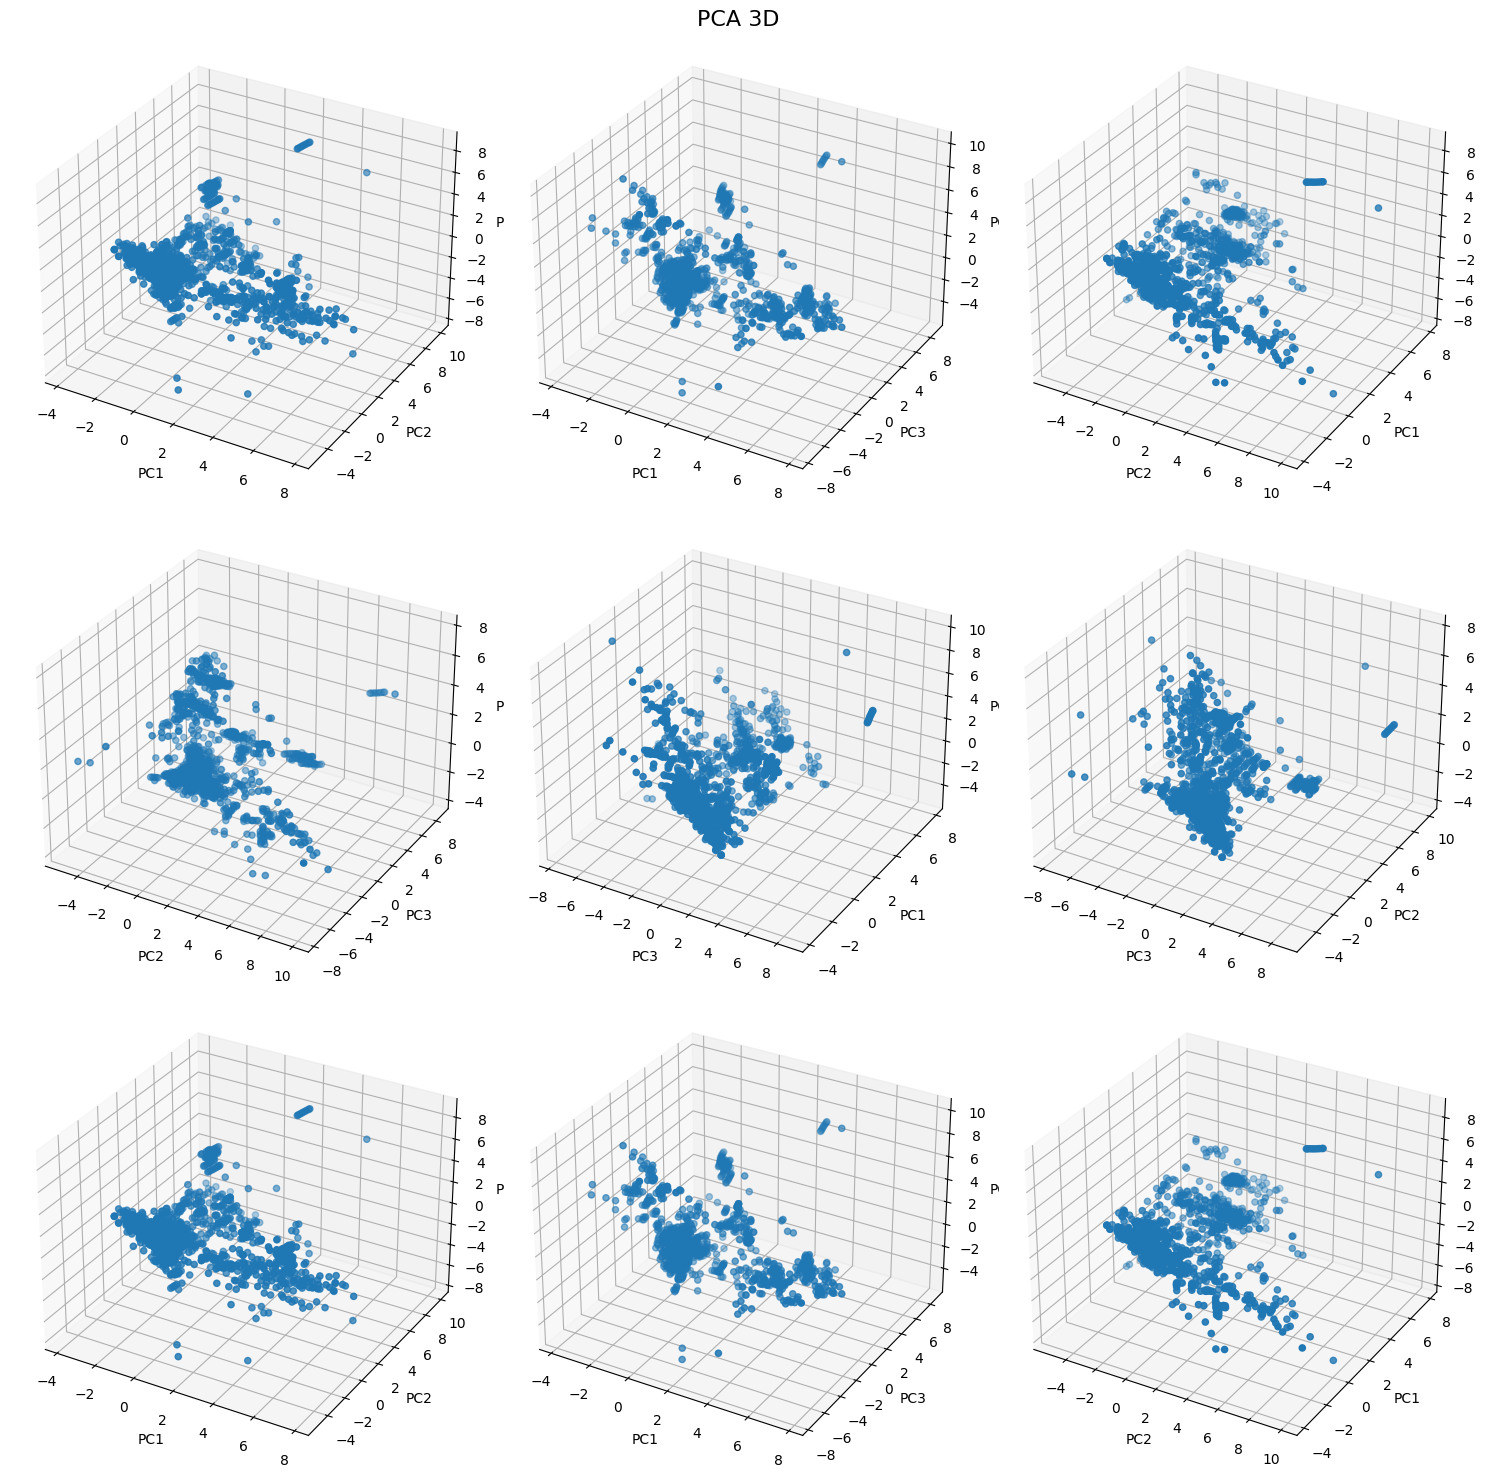

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def pca_3d_and_plot(df, title="PCA 3D"):
  """
  Performs 3-dimensional PCA and plots the results in 3D.
  The function creates a 3x3 grid of plots, displaying different
  combinations of the principal components.

  Args:
      df: Pandas DataFrame containing the data.
      title: Title for the overall plot.

  """
  pca = PCA(n_components=3)
  principal_components = pca.fit_transform(df)
  df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

  fig = plt.figure(figsize=(15, 15))
  fig.suptitle(title, fontsize=16)

  # Create a 3x3 grid of plots
  ax1 = fig.add_subplot(331, projection='3d')
  ax1.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'])
  ax1.set_xlabel('PC1')
  ax1.set_ylabel('PC2')
  ax1.set_zlabel('PC3')

  ax2 = fig.add_subplot(332, projection='3d')
  ax2.scatter(df_pca['PC1'], df_pca['PC3'], df_pca['PC2'])
  ax2.set_xlabel('PC1')
  ax2.set_ylabel('PC3')
  ax2.set_zlabel('PC2')

  ax3 = fig.add_subplot(333, projection='3d')
  ax3.scatter(df_pca['PC2'], df_pca['PC1'], df_pca['PC3'])
  ax3.set_xlabel('PC2')
  ax3.set_ylabel('PC1')
  ax3.set_zlabel('PC3')

  ax4 = fig.add_subplot(334, projection='3d')
  ax4.scatter(df_pca['PC2'], df_pca['PC3'], df_pca['PC1'])
  ax4.set_xlabel('PC2')
  ax4.set_ylabel('PC3')
  ax4.set_zlabel('PC1')

  ax5 = fig.add_subplot(335, projection='3d')
  ax5.scatter(df_pca['PC3'], df_pca['PC1'], df_pca['PC2'])
  ax5.set_xlabel('PC3')
  ax5.set_ylabel('PC1')
  ax5.set_zlabel('PC2')

  ax6 = fig.add_subplot(336, projection='3d')
  ax6.scatter(df_pca['PC3'], df_pca['PC2'], df_pca['PC1'])
  ax6.set_xlabel('PC3')
  ax6.set_ylabel('PC2')
  ax6.set_zlabel('PC1')

  ax7 = fig.add_subplot(337, projection='3d')
  ax7.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'])
  ax7.set_xlabel('PC1')
  ax7.set_ylabel('PC2')
  ax7.set_zlabel('PC3')

  ax8 = fig.add_subplot(338, projection='3d')
  ax8.scatter(df_pca['PC1'], df_pca['PC3'], df_pca['PC2'])
  ax8.set_xlabel('PC1')
  ax8.set_ylabel('PC3')
  ax8.set_zlabel('PC2')

  ax9 = fig.add_subplot(339, projection='3d')
  ax9.scatter(df_pca['PC2'], df_pca['PC1'], df_pca['PC3'])
  ax9.set_xlabel('PC2')
  ax9.set_ylabel('PC1')
  ax9.set_zlabel('PC3')

  plt.tight_layout()
  plt.show()

# Calling the function with the DataFrame
pca_3d_and_plot(df_imputed)




---



Explained Variance Ratio: [0.09121261 0.08537687 0.05889526 0.04943032 0.04361837 0.04241499
 0.03516507 0.03102164 0.02910463 0.02834587 0.02643551 0.02483939
 0.02386632 0.02359365 0.0219009  0.02054436 0.01981668 0.01962606
 0.01941647 0.01927688 0.01872266 0.01835487 0.01779084 0.01718683
 0.01712459 0.01609352 0.01527268 0.01484293 0.01356722 0.01296495
 0.01221265 0.01125779 0.01044135 0.00997016 0.0094035  0.00915532
 0.00866753 0.00716412 0.00690756 0.00599724 0.00584939 0.00532314
 0.00466849 0.00422969 0.00364474 0.00297614 0.00254445 0.002014
 0.00075571 0.00054171 0.00026081 0.00019156]


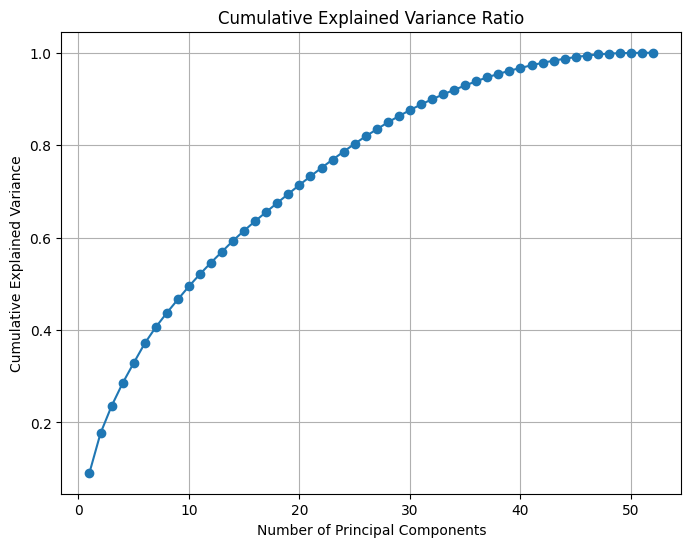

In [ ]:
X = df_imputed.iloc[:, :-1]  # All columns except the last one
y = df_imputed.iloc[:, -1]   # The last column


# Standardize only the features (X)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA to the standardized features
pca = PCA()
principal_components = pca.fit_transform(X_standardized)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# The explained variance ratio to see how many components capture most of the variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance Ratio")
plt.grid()
plt.show()

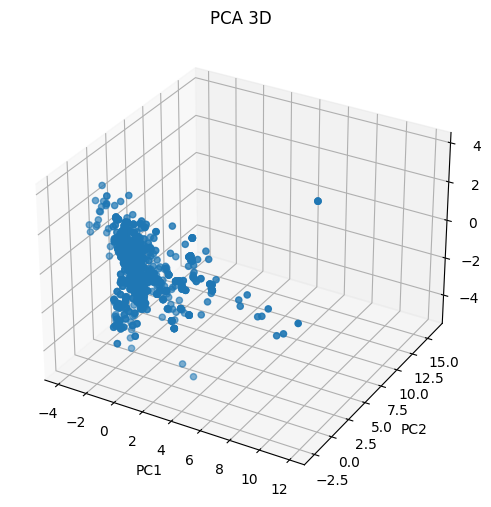

In [ ]:
# Separate your features (X) and target variables (y)
X = df_imputed.iloc[:, :15]  # First 15 columns as features
y = df_imputed.iloc[:, 35:]   # The rest of the columns as targets

# Standardize only the features (X)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply PCA to the standardized features
pca = PCA(n_components=3)  # Reduce to 3 principal components
principal_components = pca.fit_transform(X_standardized)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Concatenate the principal components with the target variables (y)
df_for_prediction = pd.concat([df_pca, y], axis=1)
# Plot the results in 3D (optional)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA 3D')
plt.show()


In [ ]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_for_prediction[['PC1', 'PC2', 'PC3']], df_for_prediction.iloc[:, 3:], test_size=0.2, random_state=42
)

model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Evaluate the model's performance (e.g., using metrics like R-squared)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("R-squared:", r2)


R-squared: -7.215923135601506e+31


In [ ]:

model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model (e.g., using R-squared)
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)



R-squared: -1.0044565004757306e+32


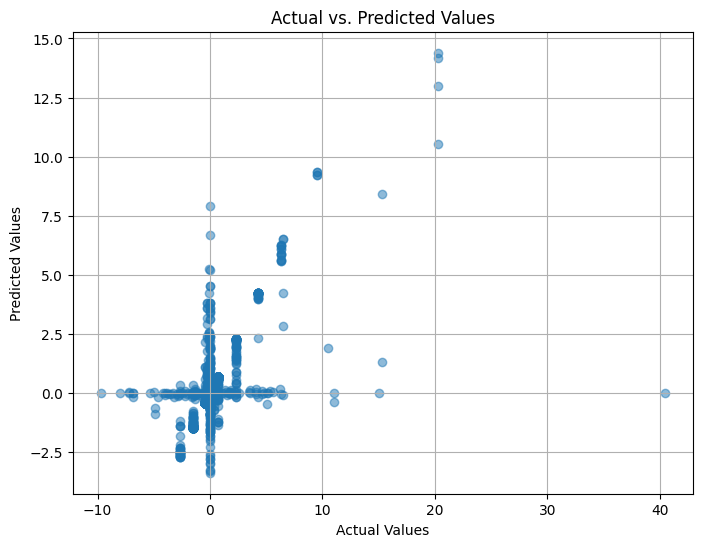

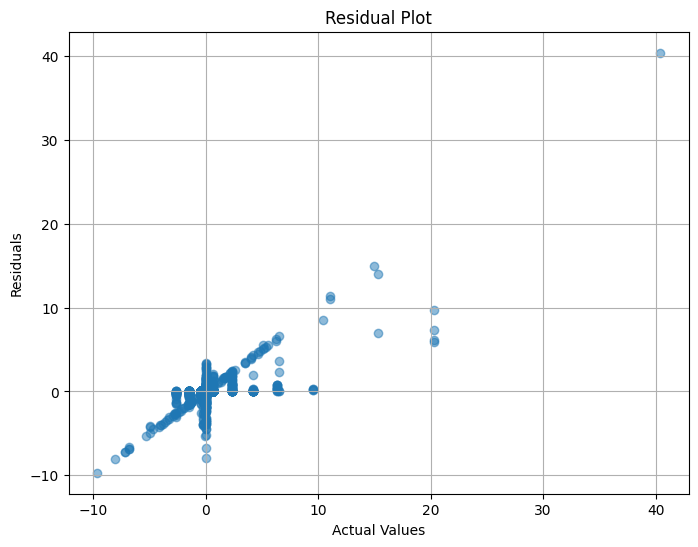

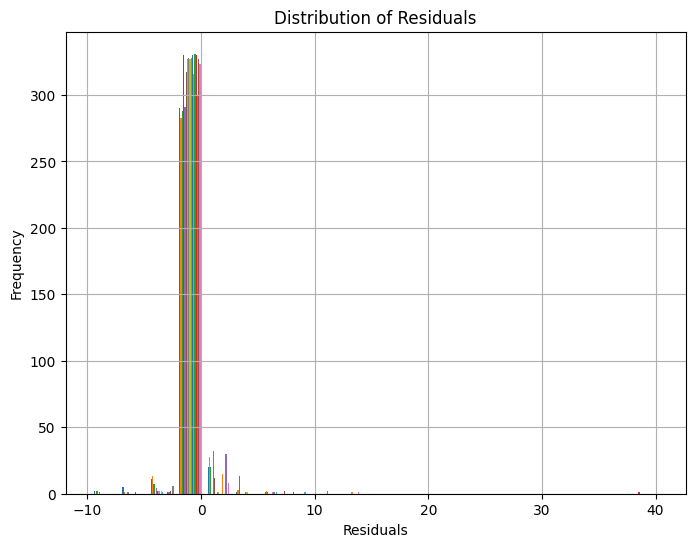

Mean Absolute Error (MAE): 0.15382339746368232
Root Mean Squared Error (RMSE): 0.8981341728736894


In [ ]:

# Compare predictions to actual values using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid()
plt.show()

# Calculate the residuals (difference between actual and predicted values)
residuals = y_test - predictions

# Plot the residuals to check for patterns
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid()
plt.show()

# Distribution of residuals using a histogram
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid()
plt.show()

# Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)






Feature Importances: [0.35912574 0.39168365 0.2491906 ]
  Feature  Importance
1     PC2    0.391684
0     PC1    0.359126
2     PC3    0.249191


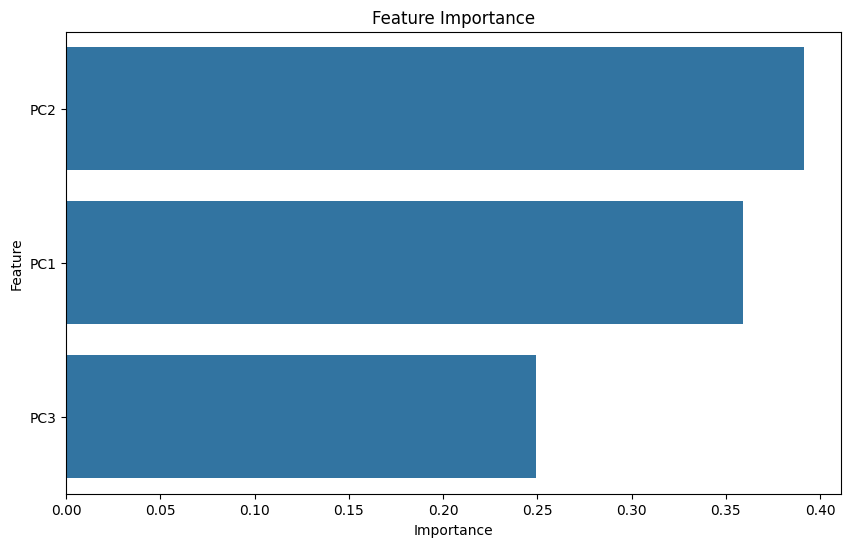

In [ ]:
feature_importances = model.feature_importances_

# Print feature importances
print("Feature Importances:", feature_importances)

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


R-squared: -1.0044565004757306e+32
Mean Absolute Error (MAE): 0.15382339746368232
Root Mean Squared Error (RMSE): 0.8981341728736894


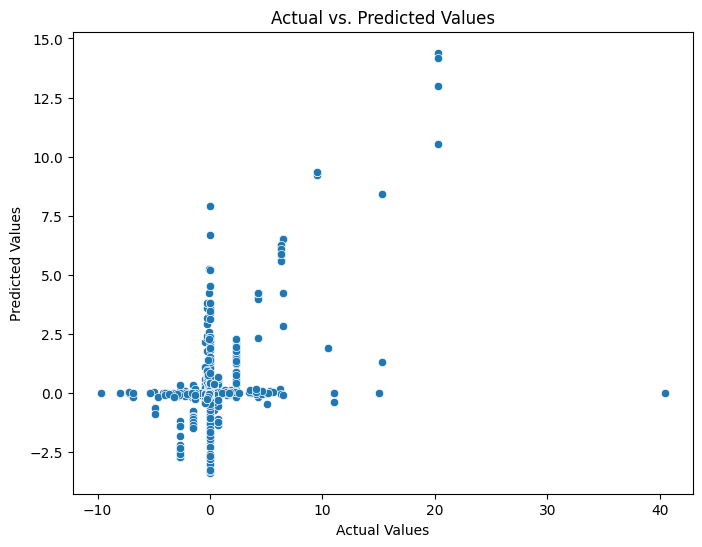

AttributeError: 'DataFrame' object has no attribute 'flatten'

<Figure size 800x600 with 0 Axes>

In [ ]:

predictions = model.predict(X_test)

# Evaluate the model using various metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize the performance using Seaborn

# 1. Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.values.flatten(), y=predictions.flatten())
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# 2. Residual plot
residuals = y_test - predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.values.flatten(), y=residuals.flatten())
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# 3. Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals.flatten(), kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

# 4. Tthe scatter plot and the distribution of residuals
sns.jointplot(x=y_test.values.flatten(), y=predictions.flatten(), kind="reg")
plt.show()

# 5. Heatmap to show the correlation between predicted and actual values
correlation_matrix = np.corrcoef(y_test.values.flatten(), predictions.flatten())
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)


R-squared: -7.215923135601506e+31
Mean Squared Error: 0.7977183523187306
Mean Absolute Error: 0.1534380585730649




---



---



# SVR



*   Loading du cleanest data set




In [7]:
import pandas as pd


In [8]:
data = pd.read_csv('/content/welddb_cleaned.csv')

imputation avec KNN :


In [11]:
def contains_string(column):
    return column.apply(lambda x: isinstance(x, str)).any()

# Suppression des colonnes contenant des valeurs non numériques
columns_to_drop = [col for col in data.columns if contains_string(data[col])]
data_cleaned = data.drop(columns=columns_to_drop)

print(f"Colonnes supprimées : {columns_to_drop}")


Colonnes supprimées : ['Weld ID']


In [13]:
from sklearn.impute import KNNImputer

# Définir l'imputer KNN avec n_neighbors défini
knn_imputer = KNNImputer(n_neighbors=5)

# Imputation des données
data_imputed = knn_imputer.fit_transform(data_cleaned)

SVR

Évaluation de la colonne cible : Type of weld_GMAA
RMSE: 0.007623124582232634, R²: 0.9903239940074158
Validation croisée RMSE: 0.8611938611382656


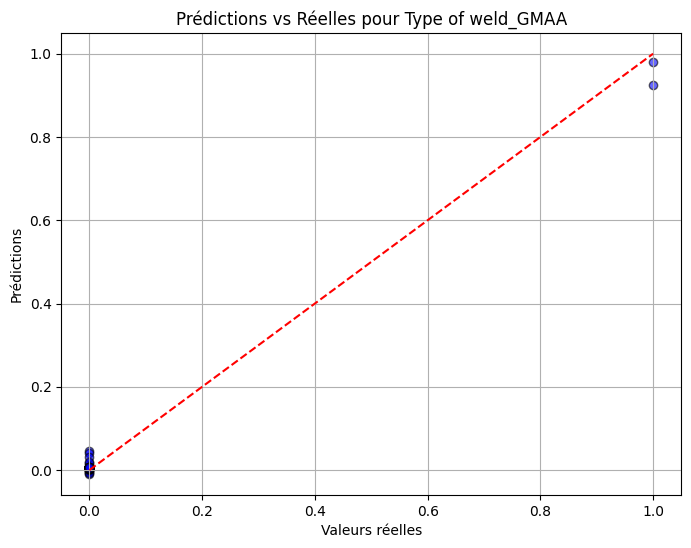

Évaluation de la colonne cible : Type of weld_GTAA
RMSE: 0.005285122618080719, R²: 0.0
Validation croisée RMSE: 0.22350742423267198


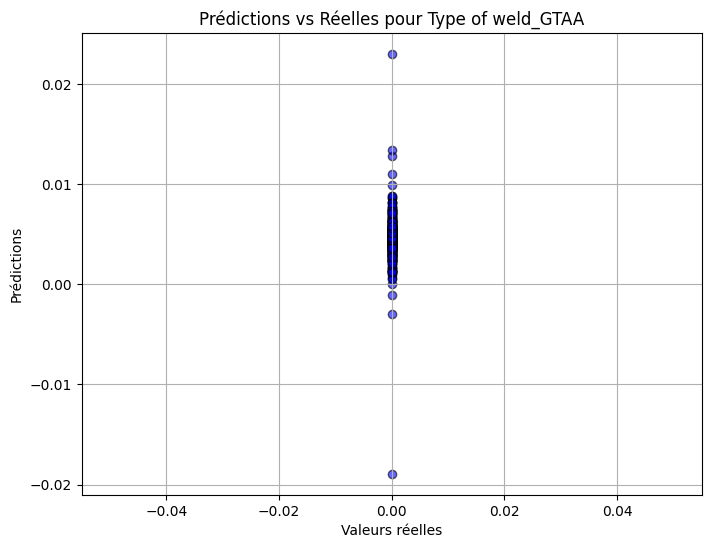

Évaluation de la colonne cible : Type of weld_MMA
RMSE: 0.16519943059947204, R²: 0.8746325777034896
Validation croisée RMSE: 0.3897806972699597


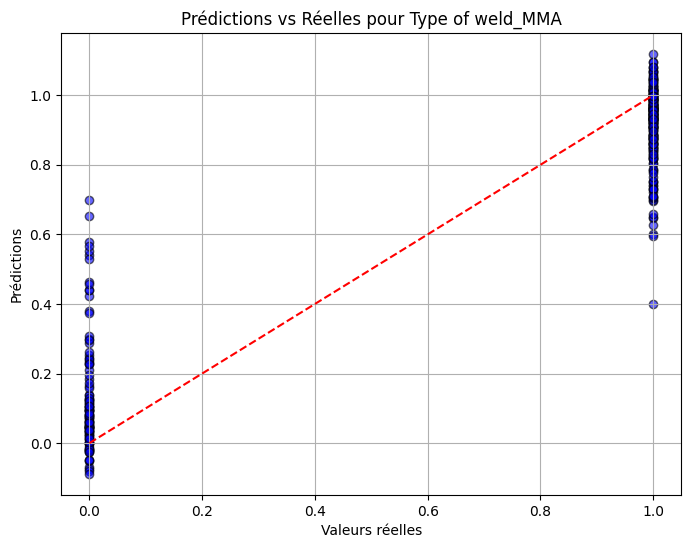

Évaluation de la colonne cible : Type of weld_NGGMA
RMSE: 0.008978059222289522, R²: 0.0
Validation croisée RMSE: 0.5232007839479759


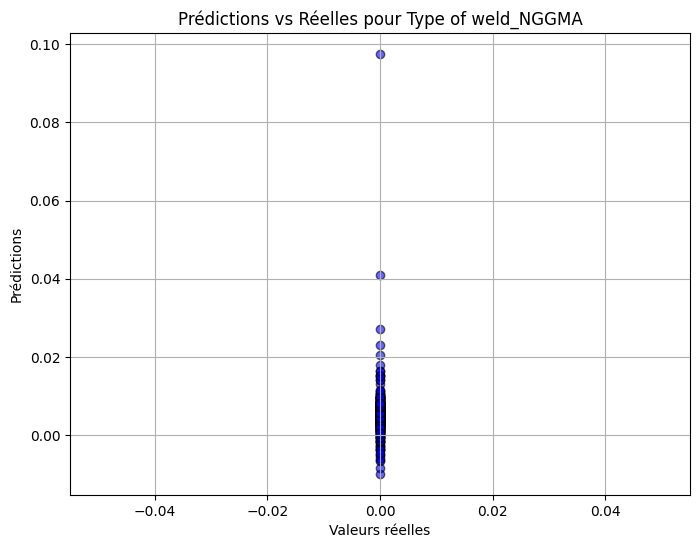

Évaluation de la colonne cible : Type of weld_NGSAW
RMSE: 0.02271353262902093, R²: 0.9567866819647974
Validation croisée RMSE: 0.5240391121019784


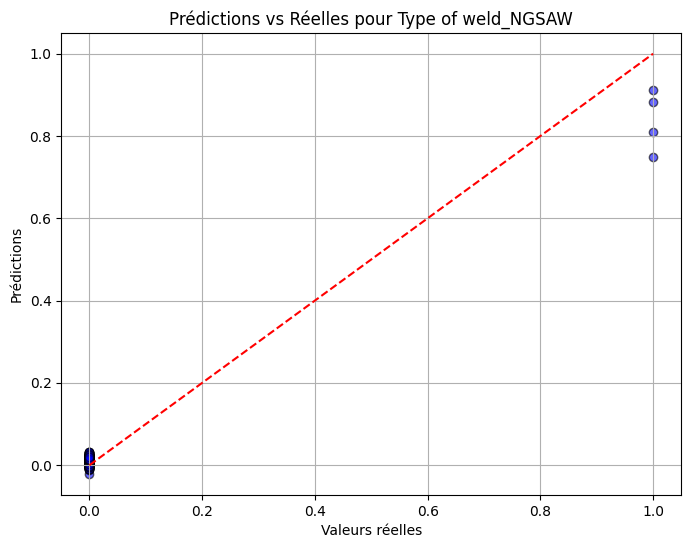

Évaluation de la colonne cible : Type of weld_SA
RMSE: 0.14030411570215412, R²: 0.8599522652842624
Validation croisée RMSE: 0.3832751182818364


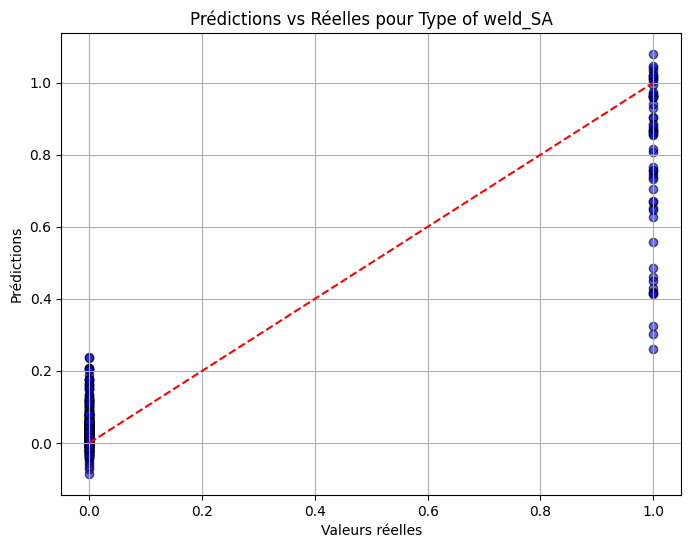

Évaluation de la colonne cible : Type of weld_SAA
RMSE: 0.005838683322319584, R²: 0.9943237706453698
Validation croisée RMSE: 0.6058139148114107


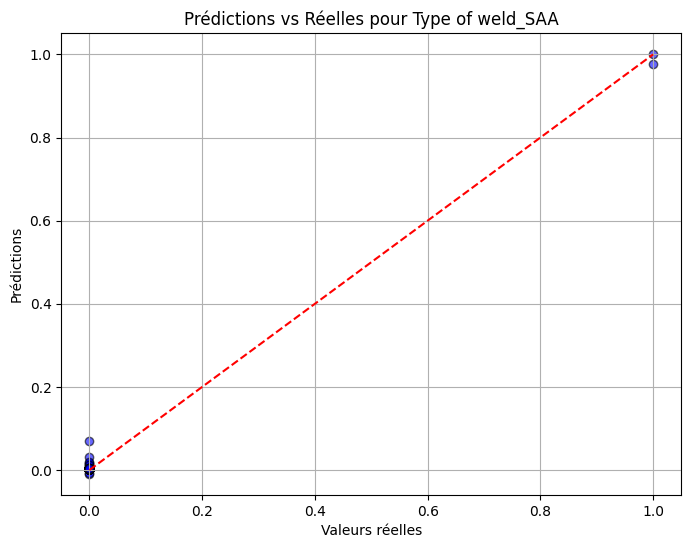

Évaluation de la colonne cible : Type of weld_ShMA
RMSE: 0.08536953899014361, R²: 0.8200820218637681
Validation croisée RMSE: 0.6017578259935018


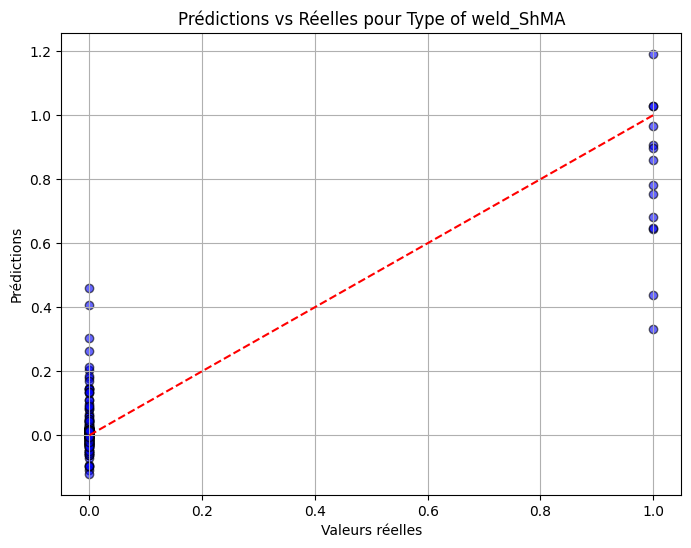

Évaluation de la colonne cible : Type of weld_TSA
RMSE: 0.03318113567060974, R²: 0.9728198917407644
Validation croisée RMSE: 0.3159534611063874


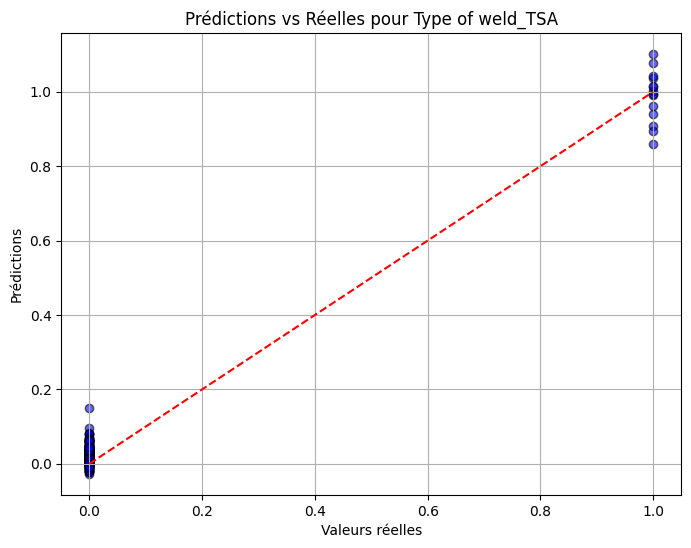

Colonne cible: Type of weld_GMAA | RMSE: 0.007623124582232634 | R²: 0.9903239940074158
Colonne cible: Type of weld_GTAA | RMSE: 0.005285122618080719 | R²: 0.0
Colonne cible: Type of weld_MMA | RMSE: 0.16519943059947204 | R²: 0.8746325777034896
Colonne cible: Type of weld_NGGMA | RMSE: 0.008978059222289522 | R²: 0.0
Colonne cible: Type of weld_NGSAW | RMSE: 0.02271353262902093 | R²: 0.9567866819647974
Colonne cible: Type of weld_SA | RMSE: 0.14030411570215412 | R²: 0.8599522652842624
Colonne cible: Type of weld_SAA | RMSE: 0.005838683322319584 | R²: 0.9943237706453698
Colonne cible: Type of weld_ShMA | RMSE: 0.08536953899014361 | R²: 0.8200820218637681
Colonne cible: Type of weld_TSA | RMSE: 0.03318113567060974 | R²: 0.9728198917407644


In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Initialisation des listes pour stocker les résultats
rmse_list = []
r2_list = []



# Sélection des 9 dernières colonnes comme cibles
target_columns = data.columns[-9:]

# Conversion du NumPy array imputé en DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=data.columns)

# Normalisation des caractéristiques (très important pour SVR)
scaler_X = StandardScaler()
X = scaler_X.fit_transform(data_imputed_df.drop(columns=target_columns))  # Exclure les colonnes cibles

# Boucle pour chaque colonne cible
for target_column in target_columns:

    print(f"Évaluation de la colonne cible : {target_column}")

    # Extraire et normaliser la colonne cible (y)
    y = data_imputed_df[target_column].values.reshape(-1, 1)
    scaler_y = StandardScaler()
    y_scaled = scaler_y.fit_transform(y).ravel()  # On a besoin d'un vecteur aplati pour SVR

    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

    # Entraîner un modèle SVR
    svr_model = SVR(kernel='rbf', C=100, gamma=0.1)
    svr_model.fit(X_train, y_train)

    # Prédictions sur les données de test
    y_pred_scaled = svr_model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()  # Inverser la normalisation

    # Inverser la transformation de y_test pour calculer les métriques
    y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Calcul des métriques
    rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
    r2 = r2_score(y_test_original, y_pred)
    rmse_list.append(rmse)
    r2_list.append(r2)

    print(f"RMSE: {rmse}, R²: {r2}")

    # Cross-validation pour évaluer la performance sur l'ensemble d'entraînement
    cross_val_scores = cross_val_score(svr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cross_val_rmse = np.sqrt(-cross_val_scores.mean())
    print(f"Validation croisée RMSE: {cross_val_rmse}")

    # Affichage du graphique prédictions vs valeurs réelles
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_original, y_pred, color='blue', edgecolor='k', alpha=0.6)
    plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--')
    plt.title(f'Prédictions vs Réelles pour {target_column}')
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Prédictions')
    plt.grid(True)
    plt.show()

# Affichage des résultats globaux
for i, col in enumerate(target_columns):
    print(f"Colonne cible: {col} | RMSE: {rmse_list[i]} | R²: {r2_list[i]}")
